In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_players = pd.read_csv('jugadores_cebollitas.csv')
df_players.head()

,jugador_id,nombre,posición,edad,partidos_jugados,goles,asistencias,pases_completados (%),tiros_al_arco,precisión_tiros (%),minutos_jugados
0,1,Tara Alvarez,Portero,18,25,2,5,89.0,8,78.2,2125
1,2,Carol Mcclain,Mediocampista,32,12,2,8,77.5,49,68.5,1032
2,3,Robert Martin,Defensa,26,12,4,5,87.3,1,71.4,816
3,4,Mr. Robert Turner,Defensa,25,17,2,4,75.9,9,35.8,1496
4,5,Christopher Kennedy,Defensa,35,23,1,7,83.5,0,0.0,2047


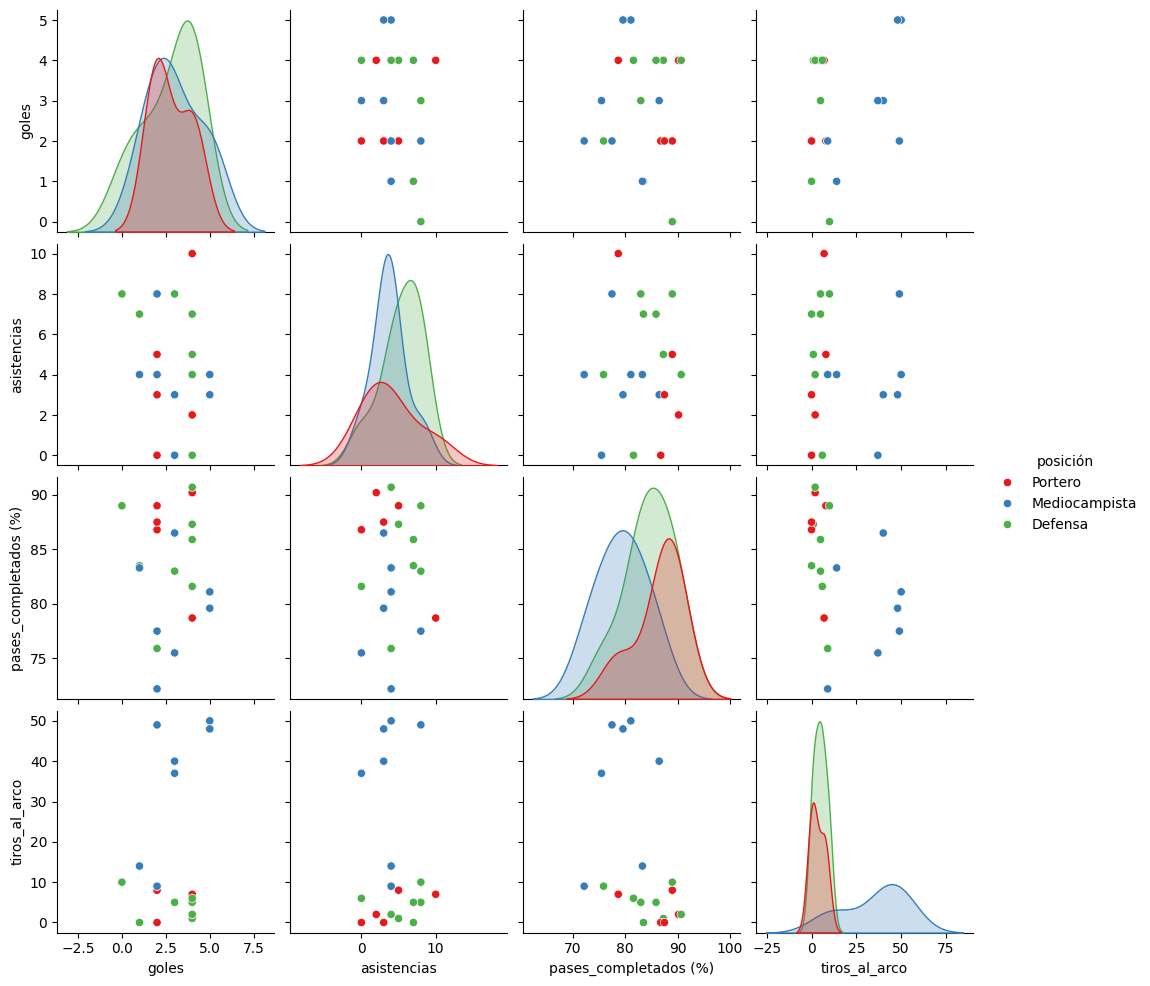

In [8]:
sns.pairplot(df_players, hue='posición', vars=['goles','asistencias','pases_completados (%)', 'tiros_al_arco'], palette='Set1')

In [9]:
from sklearn.cluster import KMeans

X = df_players[['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']]

kmeans = KMeans(n_clusters=3, random_state=42)
df_players['cluster'] = kmeans.fit_predict(X)

df_players.head()

c:\Users\jaayg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,jugador_id,nombre,posición,edad,partidos_jugados,goles,asistencias,pases_completados (%),tiros_al_arco,precisión_tiros (%),minutos_jugados,cluster
0,1,Tara Alvarez,Portero,18,25,2,5,89.0,8,78.2,2125,1
1,2,Carol Mcclain,Mediocampista,32,12,2,8,77.5,49,68.5,1032,0
2,3,Robert Martin,Defensa,26,12,4,5,87.3,1,71.4,816,1
3,4,Mr. Robert Turner,Defensa,25,17,2,4,75.9,9,35.8,1496,2
4,5,Christopher Kennedy,Defensa,35,23,1,7,83.5,0,0.0,2047,1


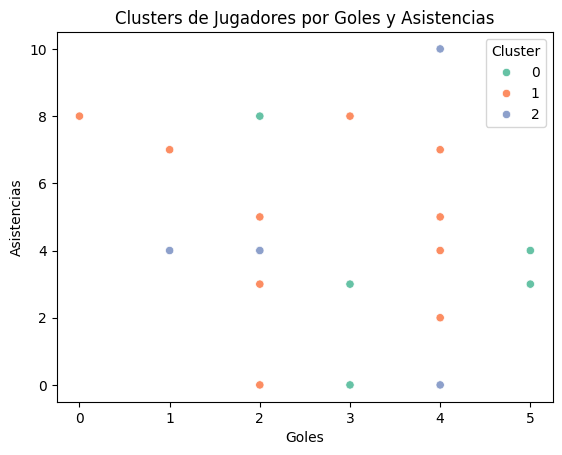

In [15]:
sns.scatterplot(data=df_players, x='goles', y='asistencias', hue='cluster', palette='Set2')
plt.title('Clusters de Jugadores por Goles y Asistencias')
plt.xlabel('Goles')
plt.ylabel('Asistencias')
plt.legend(title='Cluster')
plt.show()

In [11]:
columnas_numericas = ['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']
perfiles = df_players.groupby('cluster')[columnas_numericas].mean()
print(perfiles)

         goles  asistencias  pases_completados (%)  tiros_al_arco
cluster                                                          
0          3.6          3.6                  80.04           44.8
1          2.6          4.9                  87.29            3.3
2          2.6          4.4                  78.34            9.0


In [17]:
import ipywidgets as widgets

def clustering_interactive(cluster_number):
    km = KMeans(n_clusters=cluster_number, random_state=42)
    df_players['cluster_temp'] = km.fit_predict(X)

    sns.scatterplot(data=df_players, x='goles', y='asistencias', hue='cluster_temp', palette='Set1')
    plt.title(f'Clusters de Jugadores con {cluster_number} Clusters')
    plt.xlabel('Goles')
    plt.ylabel('Asistencias')
    plt.legend(title='Cluster')
    plt.show()

widgets.interactive(clustering_interactive, cluster_number={2,6,1})

interactive(children=(Dropdown(description='cluster_number', options=(1, 2, 6), value=1), Output()), _dom_clas…